In [180]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

plt.style.use('seaborn-colorblind')

In [181]:
import warnings
warnings.filterwarnings("ignore")

#### Загрузите данные о выживаемости пассажиров Титаника из файла titanic_train.csv.

In [221]:
ds=pd.read_csv('titanic_train.csv')

#### Представьте данные в виде таблицы. Посмотрите на первые 5 строк.

In [222]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
ds.shape

(891, 12)

#### Избавьтесь от пустых значений, заменив их на медианные значения (для количественных признаков) и на последнее встречающееся значение в столбце перед пропуском с помощью метода «ffill»  в качестве аргумента функции fillna() (для категориальных)

In [224]:
print(ds.isna().sum()) #ищем пропущенные значения

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [225]:
ds.info() #смотрим общую информацию, какай тип имеют перенные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [226]:
ds['Age'].fillna(ds['Age'].median(), inplace=True) # заменяем числовые переменные
ds['Cabin'].fillna(ds['Cabin'].ffill(), inplace=True) #заменяем категориальные
ds['Cabin'].fillna(ds['Cabin'].bfill(), inplace=True)
ds['Embarked'].fillna(ds['Embarked'].ffill(), inplace=True)
print(ds.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### Постройте график распределения целевой переменной Fare, а также графики влияния признаков на целевую переменную (попарные зависимости, корреляционные матрицы). 

In [228]:
#объединим членов семьи в одну переменную
ds['Family']=ds['SibSp']+ds['Parch']
ds.drop('SibSp', axis=1, inplace=True)
ds.drop('Parch', axis=1, inplace=True)

In [229]:
#Буква в названии Cabin скорее всего означет блок или палубу где распологалась каюта. 
#В связи с этим сделаем новый признак (извлекаем первую букву).
def select_deck(ds, col_name):
  number_column_Name = ds.columns.get_loc(col_name)

  ds[col_name].fillna('', inplace = True)
  Deck_values = [x[0] if x != '' else 'X' for x in ds.Cabin]

  ds.insert(number_column_Name, 'Deck', Deck_values)
  ds.Cabin = ds.Cabin.replace('', np.nan)
  ds.Deck = ds.Deck.replace('', np.nan)

  return(ds)

In [230]:
ds = select_deck(ds, "Cabin") 
ds.drop('Cabin', axis=1, inplace=True)

In [244]:
ds.drop('Name', axis=1, inplace=True) #удаляем столбцы с уникальными данными
ds.drop('Ticket', axis=1, inplace=True)
ds.drop('PassengerId', axis=1, inplace=True)

In [247]:
ds

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,Family
0,0,3,male,22.0,7.2500,C,S,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,C,S,0
3,1,1,female,35.0,53.1000,C,S,1
4,0,3,male,35.0,8.0500,C,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,C,S,0
887,1,1,female,19.0,30.0000,B,S,0
888,0,3,female,28.0,23.4500,B,S,3
889,1,1,male,26.0,30.0000,C,C,0


In [232]:
ds['Fare'].describe().T

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

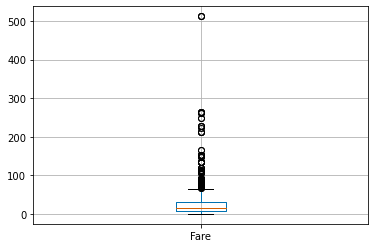

In [233]:
ds.boxplot("Fare");

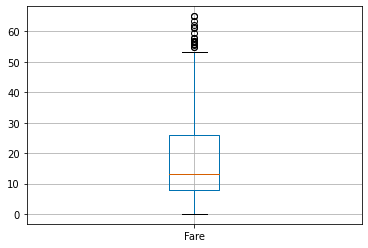

In [234]:
Q1 = ds['Fare'].quantile(0.25)
Q3 = ds['Fare'].quantile(0.75)
IQR = Q3 - Q1
ds[(ds['Fare'] < (Q3+1.5*IQR))].boxplot("Fare"); #обрезка по усам

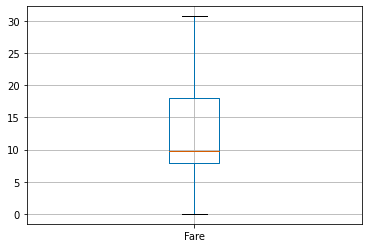

In [235]:
ds[(ds['Fare'] < ds['Fare'].quantile(0.75))].boxplot("Fare"); #обрезка по 75-у процентилю

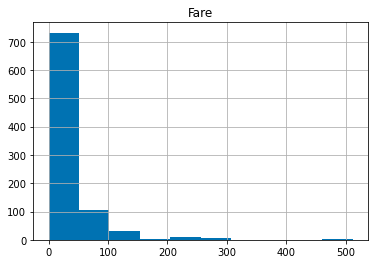

In [236]:
ds.hist("Fare"); #Большая часть билетов продана по цене до 50 ед.

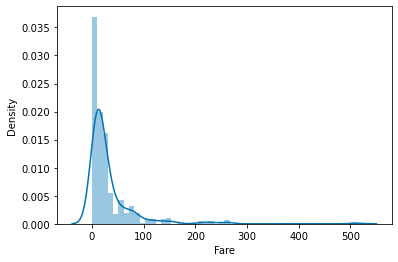

In [237]:
sns.distplot(ds["Fare"]);

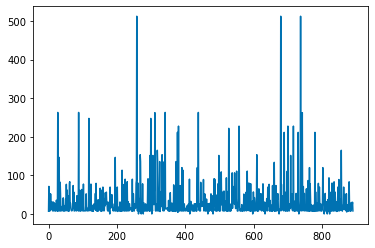

In [238]:
ds["Fare"].plot();

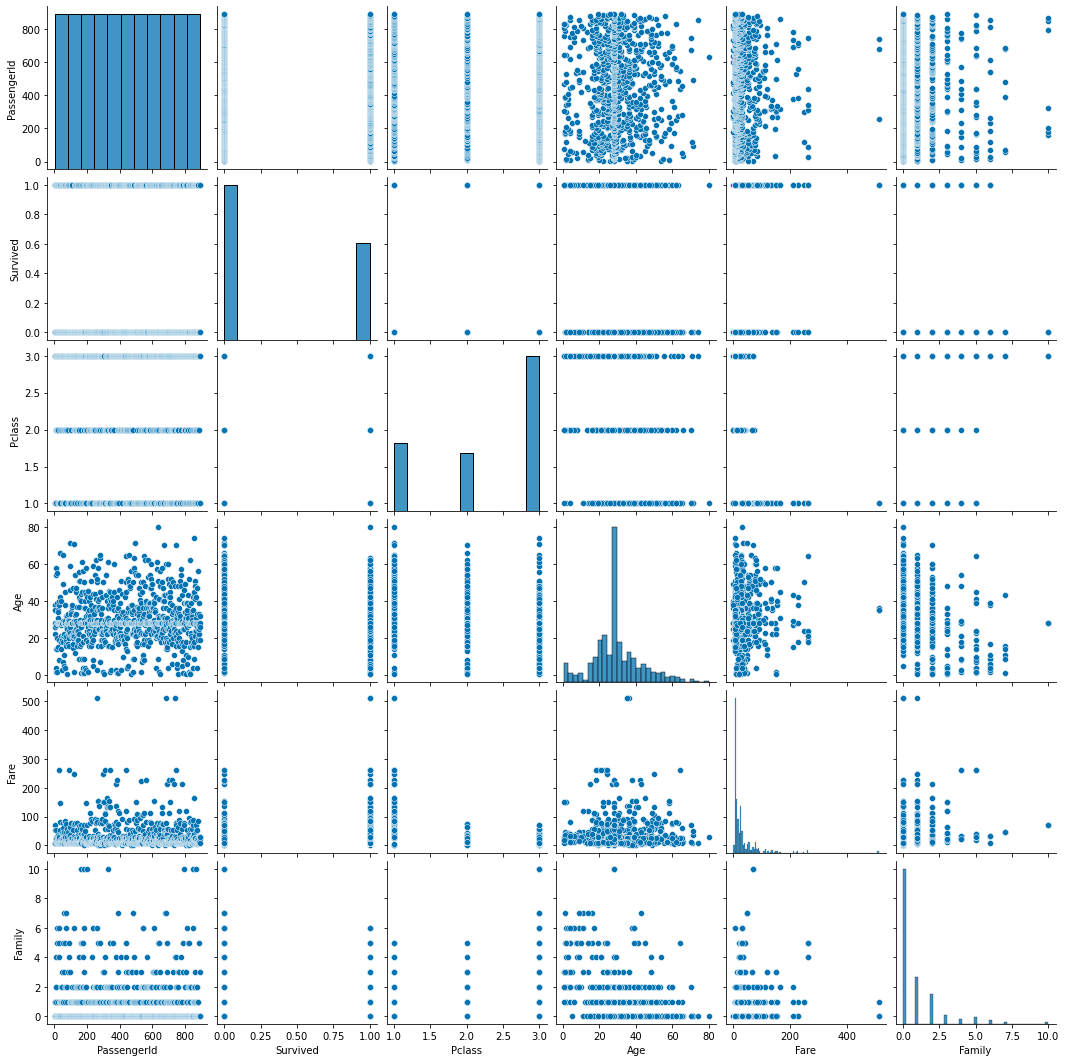

In [239]:
sns.pairplot(ds.iloc[:,-12:]);

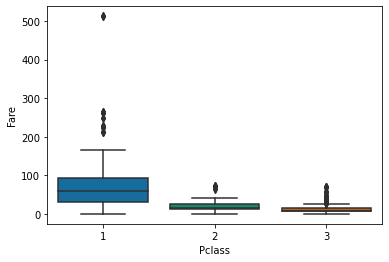

In [240]:
sns.boxplot(ds["Pclass"], ds["Fare"]); 
#видим, что есть выбросы по каждому классу пассажира и что стоимость первого класса на порядок выше остальных

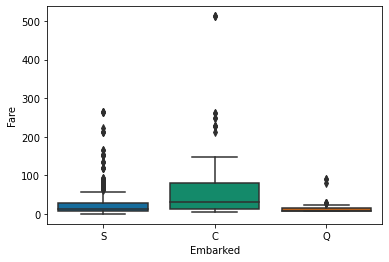

In [241]:
sns.boxplot(ds["Embarked"], ds["Fare"]); 
#средняя стоимость билета зависит от порта посадки

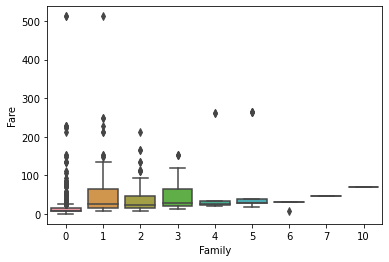

In [242]:
sns.boxplot(ds["Family"], ds["Fare"]); 
# с ростом членов семьи средняя цена билета также растет

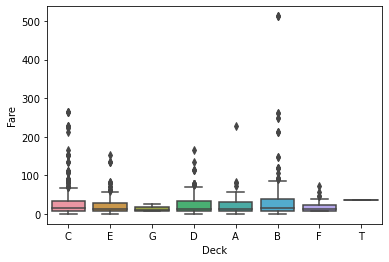

In [220]:
sns.boxplot(ds["Deck"], ds["Fare"]); 
#на первый взгляд тип каюты не влияет на стоимость билета

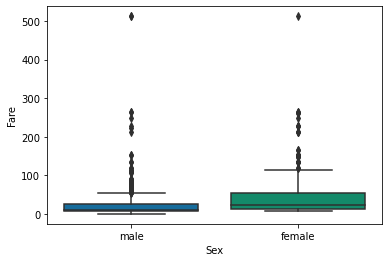

In [249]:
sns.boxplot(ds["Sex"], ds["Fare"]); 
#стоимость билета женщинам кажется выше

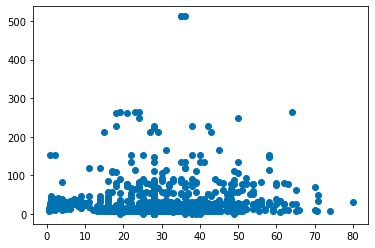

In [251]:
plt.scatter(ds["Age"], ds["Fare"]);
#стоимость билета слабо кореллирует с возрастом

In [254]:
ds

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,Family
0,0,3,male,22.0,7.2500,C,S,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,C,S,0
3,1,1,female,35.0,53.1000,C,S,1
4,0,3,male,35.0,8.0500,C,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,C,S,0
887,1,1,female,19.0,30.0000,B,S,0
888,0,3,female,28.0,23.4500,B,S,3
889,1,1,male,26.0,30.0000,C,C,0


<AxesSubplot:>

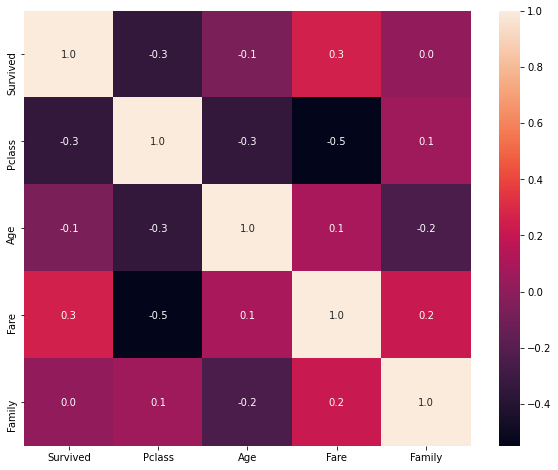

In [252]:
#корреляционное поле
plt.figure(figsize = (10,8))
sns.heatmap(ds.corr(), annot = True, fmt = ".1f")
#наиболее кореллирующим признаком с ценой билета является класс пассажира, признаки не мультиколлинеарны

#### Произведите отбор признаков. Удалите неинформативные, либо оставьте все. Аргументируйте свой выбор.

Из всех оставшихся признаков удалим только признак погиб человек или нет, т.к. данный признак точно никак не мог повлиять на стоимость билета. Остальные на основании сделанных выше выводов оставим для проведения последующего анализа

In [255]:
ds.drop('Survived', axis=1, inplace=True)

#### Закодируйте данные (столбцы object) с помощью выбранного вами метода (словарь, кодировщик LabelEncoder(), One-Hot-Encoding)

In [259]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Deck      891 non-null    object 
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [260]:
# Применим dummy преобразование для категориальных признаков
col_list = list(ds.select_dtypes(include=['object']).columns)
ds_cod = pd.DataFrame(pd.get_dummies(data=ds, columns=col_list, drop_first=True, prefix=col_list))

In [262]:
ds_cod

,Pclass,Age,Fare,Family,Sex_male,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,1,0,1,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,0,0,1,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0,1,0,1,0,0,0,0,0,0,1
887,1,19.0,30.0000,0,0,1,0,0,0,0,0,0,0,1
888,3,28.0,23.4500,3,0,1,0,0,0,0,0,0,0,1
889,1,26.0,30.0000,0,1,0,1,0,0,0,0,0,0,0


#### Разбейте данные на обучающую и проверочную выборки с учетом класса целевой переменной. Объясните почему вы пользуетесь выбранным методом и в какой пропорции вы выполняете разбиение данных.

In [263]:
X = ds_cod.drop("Fare", axis = 1)
y = ds_cod["Fare"]

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [265]:
scal = StandardScaler()

In [266]:
X_scal = scal.fit_transform(X) #масштабирование 

In [267]:
X_scal.shape, y.shape

((891, 13), (891,))

In [268]:
x_train, x_test, y_train, y_test = train_test_split(X_scal, y, test_size = 0.25, random_state = 1)
#разделили на обучающую и тестовую выборки. Тестовая выборка составила 25% от общей.

#### Обучите минимум 4 регрессионных модели из разных групп алгоритмов. Подберите метрики для оценки точности, аргументируйте свой выбор и проверьте качество работы каждой модели.
Для анализа используем следующие типы построения регресионных моделей
1.Линейная; 2.Регрессия с регуляризацией; 3.RandomForest; 4.GradientBoostingRegressor
В качестве метрик оценки точности будем использовать величину среднеквадратичного отклонения (RMSE - квадратный корень из среднеквадратической ошибки) предсказанной величины от фактической и среднее абсолютное отклонение
#### Выполните оценку точности и качества работы модели на обучающей и тестовой выборках с помощью выбранных(ой) метрик(и).

#### 1. Линейная регрессия

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
lin_reg = LinearRegression(n_jobs = -1)

In [271]:
lin_reg.fit(x_train, y_train) #обучаем модель

LinearRegression(n_jobs=-1)

In [272]:
y_pred = lin_reg.predict(x_test) #рассчитываем прогнозные значения

In [273]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [274]:
np.sqrt(mean_squared_error(y_test, y_pred)) #cмотрим СКО

70.50270591476607

In [275]:
ds["Fare"].max()

512.3292

In [276]:
mean_absolute_error(y_test, y_pred) #смотрим абсолютную погрешность

24.660759712580575

In [277]:
r2_score(y_test, y_pred) #кф детерминации R2

-0.611605183448984

In [278]:
pd.DataFrame(lin_reg.coef_, X.columns, columns = ["coef"]).sort_values(by="coef", ascending = False)
# смотрим коэффициенты при факторах уравнения регрессии

,coef
Deck_T,30.360600
Family,13.612243
Deck_C,6.073255
Deck_B,4.180293
Deck_D,1.948864
Deck_F,1.689982
Deck_E,1.555575
Deck_G,0.884039
Age,-0.981462
Sex_male,-1.941700


#### 2. Регрессия с регуляризацией. Ридж регрессия

In [279]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor

In [300]:
ridge = Ridge(tol = 0.0001, alpha = 0.1, max_iter = 100)

In [301]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.1, max_iter=100, tol=0.0001)

In [302]:
y_pred = ridge.predict(x_test)

In [303]:
np.sqrt(mean_squared_error(y_test, y_pred))

45.627143647688

In [304]:
mean_absolute_error(y_test, y_pred)

21.585218176837028

In [305]:
r2_score(y_test, y_pred)

0.3250157362335998

#### 3. Регрессия методом RandomForest

In [285]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [286]:
rf_regr = RandomForestRegressor()

In [287]:
rf_regr.fit(x_train, y_train)

RandomForestRegressor()

In [288]:
y_pred = rf_regr.predict(x_test)

In [289]:
np.sqrt(mean_squared_error(y_test, y_pred))

43.573135367505465

In [290]:
mean_absolute_error(y_test, y_pred)

15.7163457247654

In [291]:
r2_score(y_test, y_pred)

0.3844197085559532

In [293]:
pd.DataFrame(rf_regr.feature_importances_, X.columns, columns = ["Features"]).sort_values(by = "Features", ascending = False)

,Features
Pclass,0.401034
Family,0.230410
Age,0.169954
Sex_male,0.077554
Deck_B,0.041343
Embarked_S,0.038522
Deck_C,0.023555
Deck_D,0.009996
Deck_E,0.004289
Deck_F,0.001699


#### 4. Регрессия по методу GradientBoostingRegressor

In [294]:
from sklearn.ensemble import GradientBoostingRegressor

In [295]:
gb_regr = GradientBoostingRegressor(random_state = 42, learning_rate = 0.1, n_estimators = 100)

In [296]:
gb_regr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [297]:
y_pred = gb_regr.predict(x_test)

In [298]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

42.65409949319657
15.105287750141835


In [299]:
r2_score(y_test, y_pred)

0.4101132523019222

#### Выберите лучшую по точности модель для прогнозирования цены за билет.

Наилучшее результаты регрессии получены по методу GradientBoostingRegressor: модель построенная по данному методу характеризуется минимальной величиной абсолютной и относительной ошибки (15,1 и 42,7 соответсвенно). Кф детерминации составил 0,41, то есть оставленными в модели факторами мы можем объяснить 41% дисперсии.

#### Выполните подбор параметров для данной модели с помощью «поиска по сетке» и кросс-валидации.

#### Выполните предсказание для целевой переменной тестовой выборки и еще раз оцените точность модели.

#### Сохраните модель в отдельный файл .pkl.
#### Сохраните файл с предсказанием.